## Plotting the cross sectional topography of each groundwater well

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory where the CSV files are stored
directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Diver_Data/WSE/XS_topo'

# Dictionary to store the data frames
topo_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a data frame
        df = pd.read_csv(file_path)
        # Remove the '.csv' from the filename to use as the dictionary key
        key = filename[:-4]
        # Store the data frame in the dictionary
        topo_dict[key] = df

### GROUNDWATER WELL 1

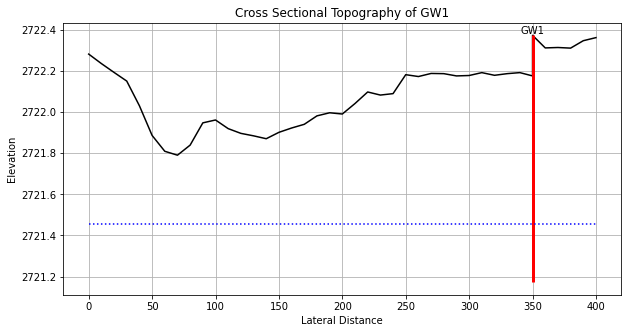

In [15]:
# Define the well properties
well_location = 350  
well_top_elevation = 2722.372  
well_length = 1.20 

# Define the water table elevation
water_table_elevation = 2721.45402

# Calculate the bottom elevation of the well
well_bottom_elevation = well_top_elevation - well_length

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(topo_dict['GW1_topo']['distance'], topo_dict['GW1_topo']['elevation'], color='black')
plt.vlines(well_location, well_bottom_elevation, well_top_elevation, colors='r', linewidth=3)
plt.text(well_location, well_top_elevation, 'GW1', ha='center', va='bottom')
plt.hlines(water_table_elevation, min(topo_dict['GW1_topo']['distance']), max(topo_dict['GW1_topo']['distance']), color='blue', linestyles='dotted')
plt.xlabel('Lateral Distance')
plt.ylabel('Elevation')
plt.title('Cross Sectional Topography of GW1')
plt.grid(True)
plt.show()

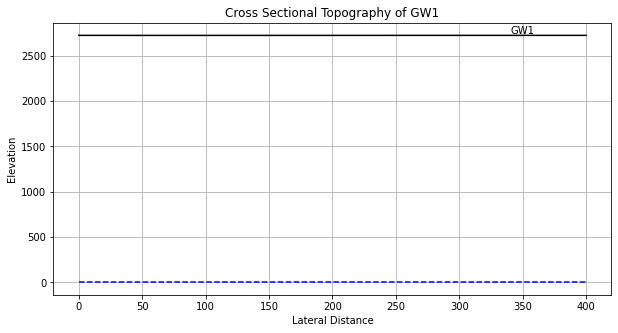

In [16]:
import matplotlib.animation as animation

# Define the well properties
well_location = 350  # replace with the actual lateral location of the well
well_top_elevation = 2722.372  # replace with the actual top elevation of the well
well_length = 1.20  # replace with the actual length of the well

# Import the WSE data
directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Diver_Data/WSE/SM21/GW1_SM21_WSE.csv'
water_table_data = pd.read_csv(directory, index_col='Date_Time', parse_dates=True)

# Calculate the bottom elevation of the well
well_bottom_elevation = well_top_elevation - well_length


################# animate the water table elevation #################

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the topography and the well
ax.plot(topo_dict['GW1_topo']['distance'], topo_dict['GW1_topo']['elevation'], color='black')
ax.vlines(well_location, well_bottom_elevation, well_top_elevation, colors='r', linewidth=3)
ax.text(well_location, well_top_elevation, 'GW1', ha='center', va='bottom')

# Add a line for the water table. Its y-data will be updated in the animate function.
water_table_line, = ax.plot(topo_dict['GW1_topo']['distance'], [0]*len(topo_dict['GW1_topo']['distance']), 'b--')

# Set the labels and title
ax.set_xlabel('Lateral Distance')
ax.set_ylabel('Elevation')
ax.set_title('Cross Sectional Topography of GW1')
ax.grid(True)

# This function will be called for each frame of the animation.
def animate(i):
    # Update the y-data of the water table line
    water_table_line.set_ydata([water_table_data['elevation'].iloc[i]]*len(topo_dict['GW1_topo']['distance']))
    # Update the title with the current date
    ax.set_title(f'Cross Sectional Topography of GW1 - {water_table_data.index[i].strftime("%m/%d/%Y")}')

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(water_table_data), interval=200)

plt.show()